In [1]:
import tensorflow as tf
from tensorflow import keras

from keras.models import Sequential
from keras import Input
from keras.layers import Dense

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [43]:

from sklearn.model_selection import train_test_split

# Define dataset path (update the path to where your dataset is located)
dataset_dir = './dataset/Train/Train'

# Parameters
img_size = (224, 224)
batch_size = 32

# Load dataset from directory
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_dir,
    image_size=img_size,    # Resize all images to 224x224
    batch_size=batch_size,  # Batch size
    label_mode="int",       # Labels as integers
    shuffle=True            # Shuffle dataset
)

# Extract images (X) and labels (y) from the dataset
X, y = zip(*[(images.numpy(), labels.numpy()) for images, labels in dataset])
X = tf.concat(X, axis=0)  # Combine batches
y = tf.concat(y, axis=0)  # Combine labels

# Convert TensorFlow tensors to NumPy arrays
X = X.numpy()
y = y.numpy()

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

# Normalize pixel values (0-255 -> 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Output sizes of the datasets
print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Found 1322 files belonging to 3 classes.
Training samples: 1057, Test samples: 265


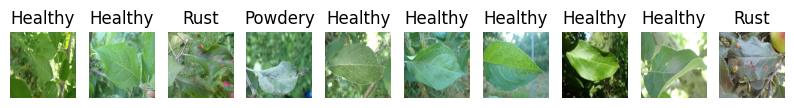

In [44]:
import matplotlib.pyplot as plt

# Function to plot the first 5 images and their labels
def plot_images(X, y, class_names, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        ax = plt.subplot(1, num_images, i + 1)
        plt.imshow(X[i])               # Show image
        plt.title(class_names[y[i]])   # Display corresponding label
        plt.axis("off")                # Hide axis

# Assuming class names are the subdirectory names in the dataset
class_names = dataset.class_names

# Plot the first 5 training images with their labels
plot_images(X_train, y_train, class_names, num_images=10)


In [45]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1057, 224, 224, 3)
Shape of y_train:  (1057,)
Shape of X_test:  (265, 224, 224, 3)
Shape of y_test:  (265,)


In [36]:
# # Reshape the X_train to (number_of_images, 50176*3) because each image is 224x224 pixels with 3 channels (RGB)
# num_images = X_train.shape[0]  # Get the actual number of images in X_train

# # Reshape the images from (224, 224, 3) to (num_images, 224 * 224 * 3)
# X_train = X_train.reshape(num_images, 224 * 224 * 3).astype('float32') / 255.0

# # Output the new shape of X_train to confirm the correct reshape
# print(f"New shape of X_train: {X_train.shape}")

# # same for test
# X_test = (X_test.reshape(X_test.shape[0], 224 * 224 * 3)).astype('float32')/255.0

# # Output the new shape of X_test to confirm the correct reshape
# print(f"New shape of X_test: {X_test.shape}")

New shape of X_train: (1057, 150528)
New shape of X_test: (265, 150528)


In [46]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (1057, 224, 224, 3)
Shape of y_train:  (1057,)
Shape of X_test:  (265, 224, 224, 3)
Shape of y_test:  (265,)


In [47]:
model = tf.keras.models.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Layer 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Convolutional Layer 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flattening the output from the convolutional layers
    tf.keras.layers.Flatten(),
    
    # Fully Connected Layer 1
    tf.keras.layers.Dense(128, activation='relu'),
    
    # Output Layer
    tf.keras.layers.Dense(3, activation='softmax')  # Assuming 3 output classes
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

C:\Users\Poste\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,347 (42.61 MB)

 Trainable params: 11,169,347 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.2)


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 33s 4s/step - accuracy: 0.2852 - loss: 2.2381 - val_accuracy: 0.3349 - val_loss: 1.0782
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 29s 4s/step - accuracy: 0.4189 - loss: 1.0732 - val_accuracy: 0.5189 - val_loss: 1.0222
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5893 - loss: 0.9784 - val_accuracy: 0.5472 - val_loss: 0.9414
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 27s 4s/step - accuracy: 0.5864 - loss: 0.8645 - val_accuracy: 0.7311 - val_loss: 0.6984
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.7562 - loss: 0.6518 - val_accuracy: 0.6415 - val_loss: 0.7472
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.7525 - loss: 0.5474 - val_accuracy: 0.7264 - val_loss: 0.5420
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8497 - loss: 0.4222 - val_accuracy: 0.8066 - val_loss: 0.4352
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 28s 4s/step - accuracy: 0.8760 - loss: 0.3683 - val_accuracy: 0.8066 - val_loss: 0.4591
Epoch 9/

In [49]:
# faire de la prediction apres le fit
pred_labels_tr = tf.math.argmax(model.predict(X_train), axis=1)
pred_labels_te = tf.math.argmax(model.predict(X_test), axis=1)

34/34 ━━━━━━━━━━━━━━━━━━━━ 13s 377ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 439ms/step


In [50]:
print(classification_report(y_train, pred_labels_tr, digits=4))
print(classification_report(y_test, pred_labels_te, digits=4))

              precision    recall  f1-score   support

           0     0.9152    0.9727    0.9430       366
           1     0.9676    0.9535    0.9605       344
           2     0.9362    0.8876    0.9112       347

    accuracy                         0.9385      1057
   macro avg     0.9396    0.9379    0.9383      1057
weighted avg     0.9391    0.9385    0.9383      1057

              precision    recall  f1-score   support

           0     0.8617    0.8804    0.8710        92
           1     0.9310    0.9419    0.9364        86
           2     0.8690    0.8391    0.8538        87

    accuracy                         0.8868       265
   macro avg     0.8873    0.8871    0.8871       265
weighted avg     0.8866    0.8868    0.8866       265



In [51]:
# recalculer la prediction
# y_pred_proba = model.predict(X_test)
y_pred_res = tf.math.argmax(y_pred_proba, axis=1).numpy()

9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 170ms/step


In [52]:
from sklearn import metrics
from seaborn import color_palette

print("accuracy: ", metrics.accuracy_score(y_true=y_test, y_pred=y_pred_res))

accuracy:  0.8867924528301887


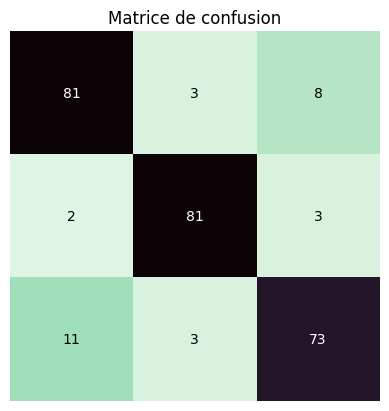

In [53]:
# matrice de confusion sert à savoir si on est bon sur qqchose ou si on confond des chose
cf_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_res)
fig, ax = plt.subplots()
im = ax.imshow(cf_matrix,cmap='mako_r')
for i in range(len(cf_matrix)):
    for j in range(len(cf_matrix[i])):
        col = 'white'
        if cf_matrix[i,j]<(cf_matrix.max()/4):
            col = 'black'
        ax.text(j, i, cf_matrix[i, j],ha="center", va="center", color=col)
ax.set_title("Matrice de confusion")
plt.axis('off')
plt.show()

category 3 ça déconne le plus = point faible
11 fois category 1 et 3 confondu

utiliser la methode SHAP ou LIME pour savoir ou est-ce que le model deconne dans la reconnaissance

In [69]:
import shap

# Ensure the input data shape is correct
X_train_sample = X_train[:100].astype('float32') / 255.0  # Use a sample of 100 images, properly normalized

# Use DeepExplainer, which works with deep learning models like CNNs
explainer = shap.DeepExplainer(model, X_train_sample)

In [78]:
# Test on a new image from X_test
test_image = X_test[:1].astype('float32') / 255.0

# Get the SHAP values for the test image
shap_values = explainer.shap_values(test_image)

In [79]:
shap_values.shape

(1, 224, 224, 3, 3)

In [82]:
import math

res_test = model.predict(test_image)
	
def getPixelsAndValues(imageId):
    # Get the original image from X_test and multiply by 255 to bring it back to the 0-255 pixel range
    pixels = X_test[imageId] * 255
    pixels = np.expand_dims(pixels, axis=0)  # Add batch dimension for SHAP
    
    # Get SHAP values for this specific image
    list_values = []
    for i in range(len(shap_values)):  # Loop over the number of classes (e.g., 3 classes)
        values = shap_values[i][imageId]  # Get SHAP values for the image for each class
        list_values.append(values)  # Collect SHAP values for the image
    
    return pixels, list_values, res_test[imageId]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [13.0..253.0].


Model prediction (class probabilities): [1.4833273e-01 1.0428355e-04 8.5156304e-01]


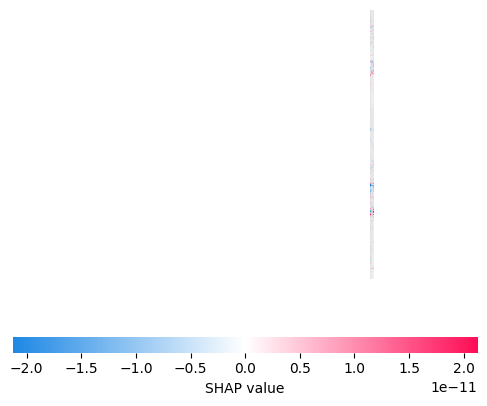

In [84]:
# Get the values for the third image (index 0)
pixels, list_values, res = getPixelsAndValues(0)

# Print the prediction result for the selected image
print("Model prediction (class probabilities):", res)

# Remove the batch dimension before plotting (squeeze the image to shape (224, 224, 3))
pixels = np.squeeze(pixels, axis=0)

# Use SHAP's image plot function to visualize the SHAP values
shap.plots.image(list_values,pixels)